# Progetto per l'esame di Data Mining

Analisi del dataset "Online Retail" (https://data.world/uci/online-retail). Contenente i dati relativi alla vendita al dettaglio da parte di una azienda con sede nel Regno Unito. L'azienda vende principalmente regali unici per tutte le occasioni. Molti clienti dell'azienda sono grossisti.

## BUSINESS UNDERSTANDING

Obiettivo: Incrementare le vendite e la loyality dei clienti attraverso un’ azione di marketing mirata.

Proposta: Suddivisione dei clienti sulla base del comportamento relativo agli acquisti effettuati al fine di progettare una campagna di marketing personalizzata che prevede l’invio di materiale pubblicitario, la proposta di vantaggi promozionali o l’invio di campioni omaggio.

Il raggiungimento di tali obiettivi si suddivide in due passi principali, successivi alla fase di preparazione del dataset:

- ***Step 1***: categorizzazione dei clienti basata su analisi RFM e clustering al fine di individuare le differenti tipologie di clienti cui indirizzare diverse promozioni. 
- ***Step 2***: determinazione di una offerta mirata per ogni tipologia di cliente. In questo caso specifico andremo a trattare esclusivamente i clienti che spendono molto acquistando grandi quantità di prodotti a prezzi scontati, al fine di inviare loro offerte vantaggiose e personalizzate riguardo prodotti che riteniamo possano suscitare interesse, sulla base degli ultimi prodotti acquistati.

# 1: DATA UNDERSTANDING

## IMPORT LIBRERIE E DATASET

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np

In [2]:
data = pd.read_excel("Online Retail.xlsx")

### Attributi del dataset:

- **InvoiceNo**: numero di fattura. Nominale.   
Un numero intero di 6 cifre assegnato in modo univoco ad ogni transazione. La lettera 'c' (opzionale) precedente alla parte numerica indica cancellazione.    


- **StockCode**: codice prodotto(item). Nominale.   
Un numero intero di 5 cifre assegnato in modo univoco a ciascun prodotto distinto.


- **Description**: nome del prodotto(item). Nominale.


- **Quantity**: le quantità di ciascun prodotto(item) per transazione. Numerico.


- **InvoiceDate**: data e ora della fattura. Numerico.    
    Il giorno e l'ora in cui è stata generata ciascuna transazione.



- **UnitPrice**: prezzo unitario. Numerico.   
    Prezzo unitario di ogni prodotto espresso in sterline


- **CustomerID**: codice cliente. Nominale.   
    Un numero intero di 5 cifre assegnato in modo univoco a ciascun cliente.


- **Country**: nome del paese. Nominale.   
    Il nome del paese in cui risiede il cliente di riferimento.

Il dataset originale contiene ***541.909*** righe e ***8*** colonne.  

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## DATA PREPARATION AND DESCRIPTION

- ***Eliminazione valori nulli***: delle 541.909 righe del dataset, solo 406.829 presentano un valore non nullo per l’attributo «CustomerID». Per la prima fase dell’analisi (customer segmentation) è fondamentale poter distinguere i clienti, decidiamo quindi di eliminare tutte le righe in questione (che potranno essere considerate in fase di ricerca di regole di associazione, in quanto il carrello è significativo indipendentemente dalla conoscenza del cliente a cui appartiene).
- ***Eliminazione transazioni non eseguite***: il dataset contiene anche gli acquisti non portati a termine, contrassegnati con la lettera «C» che precede l’attributo «InvoiceNo». Eliminando tali valori si ottiene un dataset composto da 39.7924 record.
- ***Eliminazione valori negativi***: in ultimo, dalla descrizione statistica del dataset si evince che ci sono dei record con valori negativi di «Quantity» ed «UnitPrice», decido di eliminare tali record poiché potrebbero compromettere le analisi successive.
- ***Analisi outliers***: in ultimo, analizziamo le distribuzioni degli attributi numerici per individuare l’eventuale presenza di outliers ed adottare una strategia di adeguamento/eliminazione. Guardando i due boxplot in basso si evince che i dati sembrano essere equamente distribuiti, ad esclusione di pochi punti, decido quindi, in questa prima fase, di eliminare manualmente i punti in questione e rimandare l'ulteriore analisi di outliers ai task successivi.

In [5]:
#elimino le righe incomplete
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [6]:
data.describe(exclude='number', datetime_is_numeric=True)

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,406829.0,406829,406829,406829,406829
unique,22190.0,3684,3896,NaN,37
top,576339.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,United Kingdom
freq,542.0,2077,2070,NaN,361878
mean,NaN,NaN,NaN,2011-07-10 16:30:57.879207424,NaN
min,NaN,NaN,NaN,2010-12-01 08:26:00,NaN
25%,NaN,NaN,NaN,2011-04-06 15:02:00,NaN
50%,NaN,NaN,NaN,2011-07-31 11:48:00,NaN
75%,NaN,NaN,NaN,2011-10-20 13:06:00,NaN
max,NaN,NaN,NaN,2011-12-09 12:50:00,NaN


In [7]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
#elimino gli oggetti eliminati dal carrello prima dell'acquisto.
data = data[~data['InvoiceNo'].astype(str).str.startswith('C')]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In ultimo, dalla descrizione del dataset si evince che ci sono dei record con valori negativi di quantity ed unit_price(probabilmente si riferiscono a resituzioni/rimborsi), decido di eliminare tali record.

In [9]:
data = data[(data['Quantity']>0) & (data['UnitPrice']>0)]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


### ELIMINAZIONE OUTLIERS

### Quantity

Per quanto riguarda la feature **Quantity** possiamo individuare facilmente dal boxplot la presenza di due punti che si discostano in maniera esagerata dalla media, si può quindi definire un criterio intuitivo di eliminazione degli outliers (>10.000) piuttosto che applicare funzioni di calcolo alla distribuzione.
- L'eventuale ulteriore eliminazione di outliers è rimandata ai singoli task (clustering e association-analysis)

<AxesSubplot:>

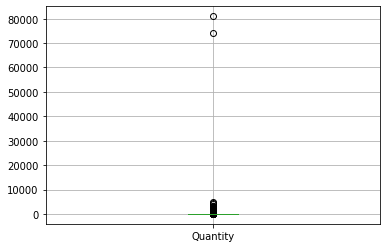

In [10]:
data.boxplot(column = 'Quantity')

In [11]:
#elimino esclusivamente i due valori piu alti
data[data['Quantity'] > 10000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom


In [12]:
data = data[data['Quantity'] < 10000]

<AxesSubplot:>

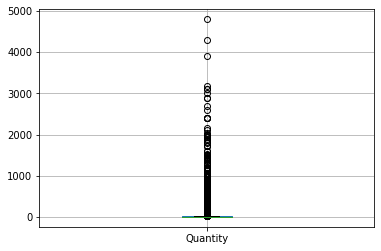

In [13]:
data.boxplot(column = 'Quantity')

### UnitPrice

<AxesSubplot:>

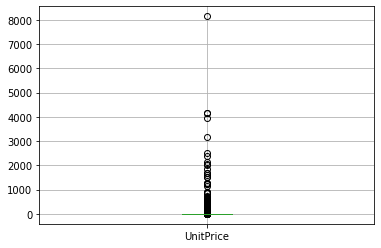

In [14]:
data.boxplot(column = 'UnitPrice')

In [15]:
data[data['UnitPrice']>5000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029.0,United Kingdom


Decido di eliminare la riga precedente, in quanto non si riesce a comprenderne la tipologia.

In [16]:
data = data[data['UnitPrice']<5000]

<AxesSubplot:>

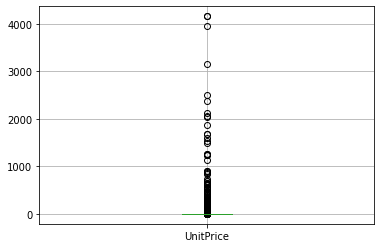

In [17]:
data.boxplot(column = 'UnitPrice')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397881 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397881 non-null  object        
 1   StockCode    397881 non-null  object        
 2   Description  397881 non-null  object        
 3   Quantity     397881 non-null  int64         
 4   InvoiceDate  397881 non-null  datetime64[ns]
 5   UnitPrice    397881 non-null  float64       
 6   CustomerID   397881 non-null  float64       
 7   Country      397881 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


### Il dataset ottenuto è costituito da 397.881 righe

# DESCRIZIONE DEGLI ATTRIBUTI

Le features Quantity ed UnitPrices sono state descritte nella fase precedente, ci concentriamo quindi sugli altri attributi del dataset.

### Country

I clienti dello store provengono da ***37 diversi paesi***, anche se circa il 90% di essi proviene dal Regno Unito.
Dato che la provenienza dei clienti potrebbe influire sul loro comportamento di acquisto, verranno selezionati, per l'analisi RFM (Notebook n.2), esclusivamente gli acquisti afferenti a clienti provenienti dal Regno Unito.

In [19]:
data['Country'].nunique()

37

In [20]:
df_c = data.drop_duplicates(subset=['CustomerID'])
count = df_c['Country'].value_counts(normalize=True)

In [21]:
count

United Kingdom          0.903620
Germany                 0.021674
France                  0.020060
Spain                   0.006456
Belgium                 0.005534
Switzerland             0.004611
Portugal                0.004381
Italy                   0.003228
Finland                 0.002767
Norway                  0.002306
Netherlands             0.002075
Austria                 0.002075
Australia               0.002075
Channel Islands         0.002075
Denmark                 0.001845
Sweden                  0.001845
Japan                   0.001845
Cyprus                  0.001614
Poland                  0.001383
Greece                  0.000922
USA                     0.000922
Canada                  0.000922
Unspecified             0.000922
EIRE                    0.000692
Israel                  0.000692
Malta                   0.000461
Bahrain                 0.000461
United Arab Emirates    0.000461
Iceland                 0.000231
Brazil                  0.000231
European C

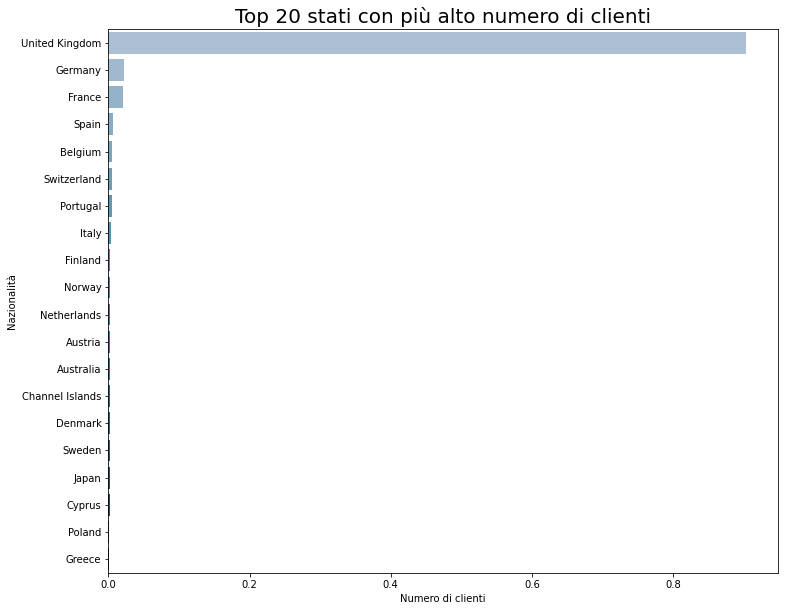

In [22]:
plt.rcParams['figure.figsize'] = (12, 10)
a = count.head(20)
sns.barplot(x = a.values, y = a.index, palette = 'PuBuGn_d')
plt.title('Top 20 stati con più alto numero di clienti', fontsize = 20)
plt.xlabel('Numero di clienti')
plt.ylabel('Nazionalità')
plt.show()

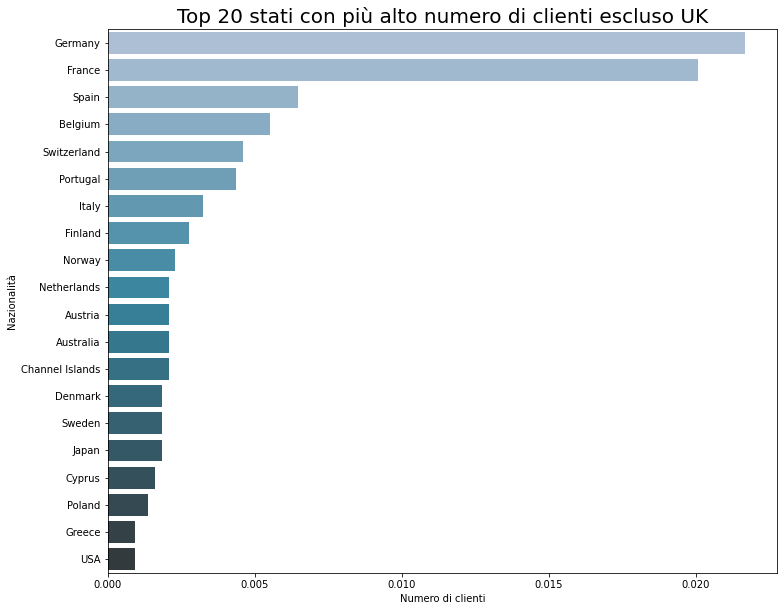

In [23]:
plt.rcParams['figure.figsize'] = (12, 10)
a = count.head(21)[1:]
sns.barplot(x = a.values, y = a.index, palette = 'PuBuGn_d')
plt.title('Top 20 stati con più alto numero di clienti escluso UK', fontsize = 20)
plt.xlabel('Numero di clienti')
plt.ylabel('Nazionalità')
plt.show()

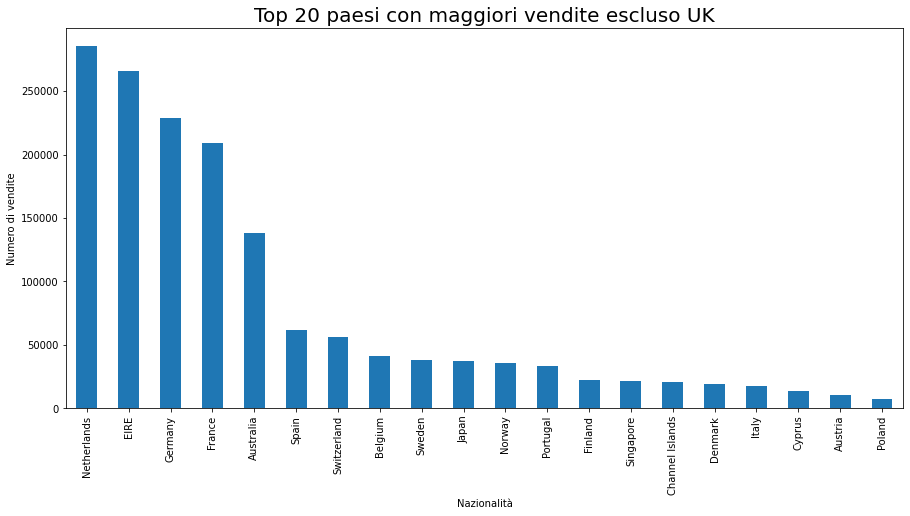

In [24]:
data['Sales'] = data['UnitPrice'] * data['Quantity']
data['Sales'].groupby(data['Country']).agg('sum').sort_values(ascending = False).head(21)[1:]
                .plot.bar(figsize = (15, 7))
#sns.barplot(x = b.values, y = b.index, palette = 'magma')
plt.title('Top 20 paesi con maggiori vendite escluso UK', fontsize = 20)
plt.xlabel('Nazionalità')
plt.ylabel('Numero di vendite')
plt.show()

### StockCode

Il numero di prodotti presenti nel dataset è ***3.664***. Dalla distribuzione si evince la presenza di alcuni prodotti presenti in molti acquisti (il prodotto _"85123A"_ è presente in 2.035 transazioni su circa 18.000). Questo dato non è influente ai fini dell'analisi RFM ma andrà considerato ai fini dell'analisi di associazione se dovessimo notare una eccessiva presenza, nelle regole, dell'item in questione (_"WHITE HANGING HEART T-LIGHT HOLDER"_). 

In [25]:
data['StockCode'].nunique()

3664

In [26]:
data['StockCode'].value_counts()

85123A    2035
22423     1723
85099B    1618
84879     1408
47566     1396
          ... 
90036F       1
37330        1
85031C       1
84551        1
37461        1
Name: StockCode, Length: 3664, dtype: int64

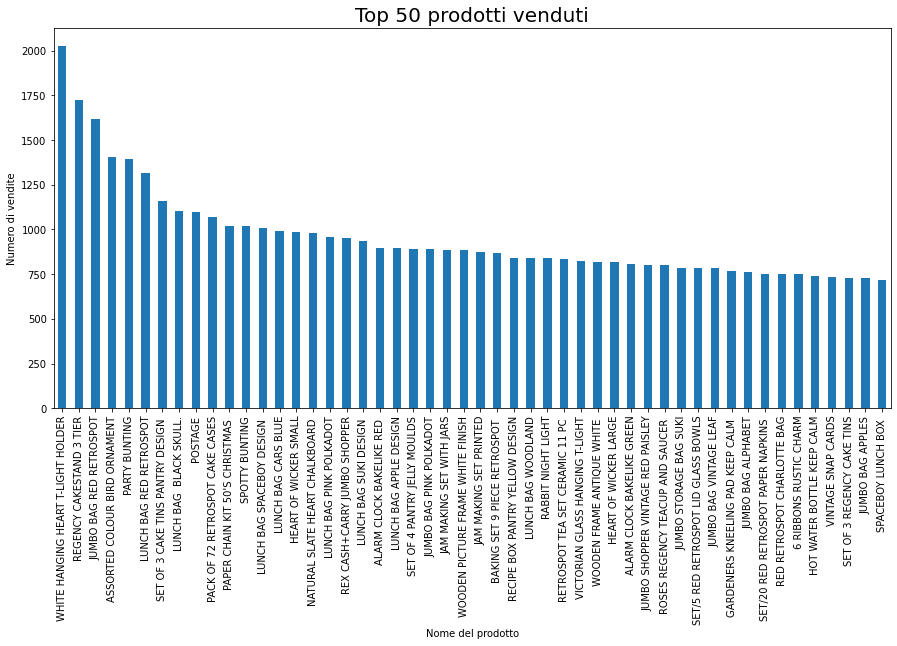

In [27]:
data['Description'].value_counts().head(50).plot.bar(figsize = (15, 7))
plt.title('Top 50 prodotti venduti', fontsize = 20)
plt.xlabel('Nome del prodotto')
plt.ylabel('Numero di vendite')
plt.show()

### CustomerID

Il numero di clienti è ***4.337***, di cui 3.919 provenienti dal Regno Unito.

In [28]:
data['CustomerID'].nunique()

4337

In [29]:
len(df_c[df_c['Country']=='United Kingdom'])

3919

### InvoiceNo

In ultimo, ***il dataset contiene 18.529 transazioni***

In [30]:
data['InvoiceNo'].value_counts()

576339    542
579196    533
580727    529
578270    442
573576    435
         ... 
556918      1
556885      1
544170      1
556842      1
575830      1
Name: InvoiceNo, Length: 18529, dtype: int64

### InvoiceDate

Come già introdotto, l'arco temporale in cui si svolgono gli acquisti inerenti a questo dataset si riferisce ad un periodo di ***373 giorni*** compreso tra il 01/12/2010 ed il 09/12/2012.

In [31]:
data['InvoiceDate'].min()

Timestamp('2010-12-01 08:26:00')

In [32]:
data['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [33]:
data['InvoiceDate'].max() - data['InvoiceDate'].min()

Timedelta('373 days 04:24:00')

### Sales per month

In [34]:
data2 = data.copy()
data2['invoice_value'] = data2['Quantity']*data2['UnitPrice']
data2['Year'] = pd.DatetimeIndex(data2['InvoiceDate']).year
data2['Month'] = pd.DatetimeIndex(data2['InvoiceDate']).month
data2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,invoice_value,Year,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,15.30,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,22.00,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34,2010,12


In [35]:
monthly = data2.groupby(['Year', 'Month'])['invoice_value'].sum()
monthly = monthly.to_frame()
monthly = monthly.set_index(pd.Index(monthly.index))

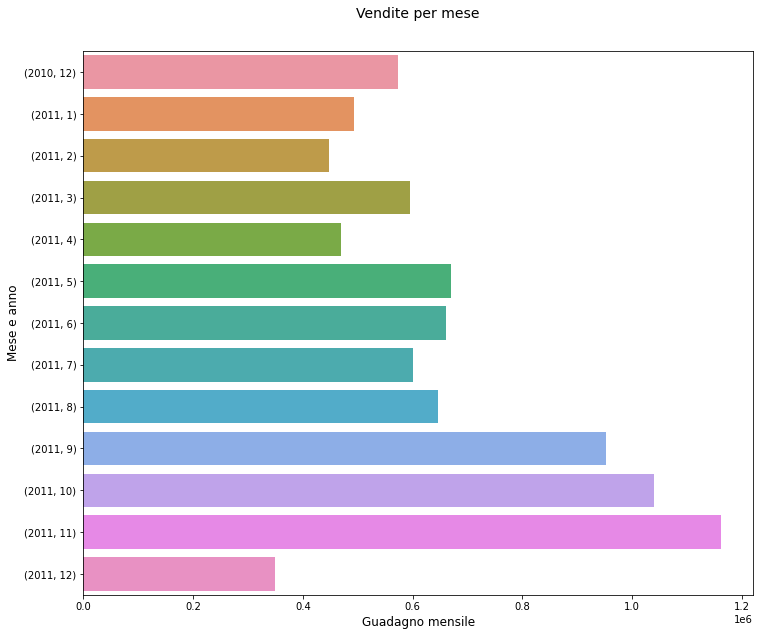

In [36]:
#Plotting the monthly revenue
h = sns.barplot(x = 'invoice_value', y = monthly.index, data = monthly)
h.set_xlabel('Guadagno mensile', size = 12)
h.set_ylabel('Mese e anno', size = 12)
h.set_title('Vendite per mese', size = 14, y = 1.05)
plt.show()

### DESCRIZIONE E SALVATAGGIO DEL DATASET PULITO

In [37]:
data.describe()

,Quantity,UnitPrice,CustomerID,Sales
count,397881.000000,397881.000000,397881.000000,397881.000000
mean,12.598242,3.096038,15294.426122,21.759300
std,42.886053,17.938862,1713.140274,95.296596
min,1.000000,0.001000,12347.000000,0.001000
25%,2.000000,1.250000,13969.000000,4.680000
50%,6.000000,1.950000,15159.000000,11.800000
75%,12.000000,3.750000,16795.000000,19.800000
max,4800.000000,4161.060000,18287.000000,38970.000000


In [38]:
data.describe(exclude='number', datetime_is_numeric=True)

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,397881.0,397881,397881,397881,397881
unique,18529.0,3664,3876,NaN,37
top,576339.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,United Kingdom
freq,542.0,2035,2028,NaN,354318
mean,NaN,NaN,NaN,2011-07-10 23:41:43.181554176,NaN
min,NaN,NaN,NaN,2010-12-01 08:26:00,NaN
25%,NaN,NaN,NaN,2011-04-07 11:12:00,NaN
50%,NaN,NaN,NaN,2011-07-31 14:39:00,NaN
75%,NaN,NaN,NaN,2011-10-20 14:33:00,NaN
max,NaN,NaN,NaN,2011-12-09 12:50:00,NaN


In [39]:
#Salvataggio del dataset pulito
data.to_csv('cleaned_online_retail.csv', index=False)